**Linear Regression**

- Linear Regression is a simple approach to supervised learning. It assumes that the dependance of the response(endogenous) variable $Y$ on $X_1,X_2,...X_p$ is linear.
- True Regression functions are never linear.
- Although it may seem overly simplistic, linear regression is extremely useful both conceptually and practically.

In [0]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

In [0]:
data = pd.read_csv('/content/drive/My Drive/Repos/Git/Statistics-Basics/An Introduction to Statistical Learning/Dataset/Advertising.csv')

In [3]:
data.head(3)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3


In [4]:
data.drop('Unnamed: 0',1,inplace=True)
data.head(3)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3


**Linear Regression for Advertising Data**

Questions we might ask:
- Is there a relationship between advertising budget and sales?
- How strong is the relationship between advertising budget and sales?
- Which media conntributes to the sales?
- How accurate can we predict future sales?
- Is the relationship linear?
- Is there a synergy among the advertising data?

**Simple Linear Regression using a Single Predictor X.**
- We assume a model ,

  $Y = \beta _0+\beta _1X+\epsilon,$

  where $\beta_0$ and $\beta_1$ are two unknown constants that represent the *intercept* and the *slope*, also know as the *coeefficients* or *parameters* and $\epsilon$ is the error term

- Given some estimates of $\hat \beta_0$ and $\hat\beta_1$ for the model coefficients, we predict the future sales using,

  $\hat y = \hat\beta_0+\hat\beta_1x$

  where $\hat y$ indicates a prediction of $Y$ on the basis of $X = x$.
  The hat symbol ($\hat y$) denotes an estimated value.

In [0]:
from statsmodels.formula.api import ols

In [0]:
# TV Model
model_tv = ols('Sales ~ TV',data=data).fit()
tv_pred = model_tv.predict(data['TV'])

# TV Model
model_radio = ols('Sales ~ Radio',data=data).fit()
radio_pred = model_radio.predict(data['Radio'])

# TV Model
model_np = ols('Sales ~ Newspaper',data=data).fit()
np_pred = model_np.predict(data['Newspaper'])

[]

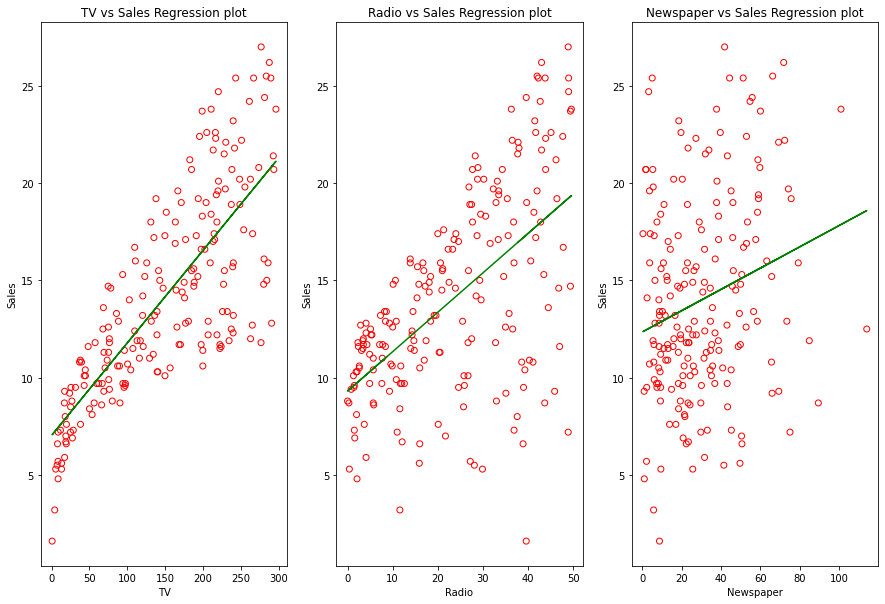

In [20]:
fig, ax = plt.subplots(1,3,figsize=(15,10))

# TV vs Sales
ax[0].scatter(data['TV'],data['Sales'],facecolors='None',edgecolor='r')
ax[0].plot(data['TV'],tv_pred,'g')
ax[0].set_title('TV vs Sales Regression plot')
ax[0].set_xlabel('TV')
ax[0].set_ylabel('Sales')

# Radio vs Sales
ax[1].scatter(data['Radio'],data['Sales'],facecolors='None',edgecolor='r')
ax[1].plot(data['Radio'],radio_pred,c='g')
ax[1].set_title('Radio vs Sales Regression plot')
ax[1].set_xlabel('Radio')
ax[1].set_ylabel('Sales')

# Newspaper vs Sales
ax[2].scatter(data['Newspaper'],data['Sales'],facecolors='None',edgecolor='r')
ax[2].plot(data['Newspaper'],np_pred,c='g')
ax[2].set_title('Newspaper vs Sales Regression plot')
ax[2].set_xlabel('Newspaper')
ax[2].set_ylabel('Sales')

plt.plot()

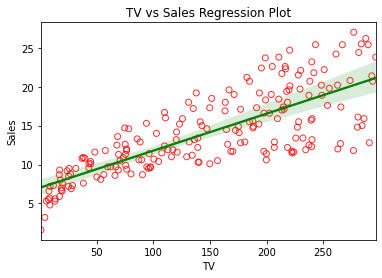

In [34]:
sns.regplot(data['TV'],data['Sales'],color='g',scatter_kws={'facecolor':'None','edgecolor':'r'},order=1,ci=100)
plt.title('TV vs Sales Regression Plot')
plt.show()

**Estimation of parameters by Least Squares.**
- Let $\hat y_i = \hat\beta_0+\hat\beta_1x_i$ be the prediction for $Y$ based on the $i$th value of $X$. Then $e_i = y_i-\hat y_i$ represents the $i$th *residual*. 
- We define the *residual sum of squares*(**RSS**) as

  **RSS** = $e_1^2+e_2^2+...+e_n^2$,

  or equivalently as,

  **RSS** = $(y_1 - \hat y_1)^2+(y_2 - \hat y_2)^2+...+(y_n - \hat y_n)^2$

- The Least Squares approach chooses $\hat\beta_0$ and $\hat\beta_1$ to minimize the RSS. The minimizing values can be shown to be

  $\hat\beta_1 = \frac {\sum_{i=1}^n(x_i-\bar x)(y_i-\bar y)}{\sum_{i=1}^n(x_i - \bar x)^2}$

  $\hat\beta_0 = \bar y - \hat\beta_1\bar x$,

  where $\bar y = \frac{1}{n}\sum_{i=1}^n y_i$ and $\bar x = \frac{1}{n}\sum_{i=1}^n x_i$ are the sample means.

**Assessing the Accuracy of the Coefficients Estimates**
- The standard error of an Estimator reflects how it varies under repeated sampling. We have,

  $SE(\hat\beta_1)^2 = \frac {\sigma^2}{\sum_{i=1}^n(x_i-\bar x)^2}$,

  $SE(\hat\beta_0)^2 = \sigma^2[\frac{1}{n}+\frac{\bar x^2}{\sum_{i=1}^n(x_i-\bar x)^2}]$,

  where $\sigma^2 = Var(\epsilon)$

- These Standard Error can be used to compute confidence intervals. A $95$% confidence interval is defined as the range of values such that with $95$% probability the range will contain the true unknown value of the parameter. It has the form

  $\hat\beta_1\pm2.SE(\hat\beta_1)$

- That is, there is approximately a $95$% chance that the interval 

  $[\hat\beta_1-2.SE(\hat\beta_1),\hat\beta_1+2.SE(\hat\beta_1)]$,

  will contain the true value of $\beta_1$.

**Hypothesis Testing on Coefficients**
- Standard Errors  can also be used to perform hypothesis testing on the coefficients. The most common hypothesis test involves testing the null hypothesis of,
  - $H_0:$ There is no relationship between $X$ and $Y$.
  - $H_A:$ There is some relationship between $X$ and $Y$.

- Mathematically, this corresponds to testing,
  
  $H_0:\beta_1=0$

  $H_A:\beta_1\ne0$

  since, if $\beta_1=0$, then the model reduces to $Y = \beta_0+\epsilon$ and $X$ is not associated with $Y$.

- To Test the null hypothesis, we compute the t-statistic, given by ,

  $t = \frac{\beta_1 - 0}{SE(\hat\beta_1)}$,
- This will have a t-distribution with $n-2$ degrees of freedom, assuming, $\beta_1=0$.
- Using statistical Software, it is easy to compute the probability of observing any value equal to $\left|t\right|$ or larger. We call this the probability, the $p-value$.

**Example**

In [45]:
print(model_tv.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 24 Apr 2020   Prob (F-statistic):           1.47e-42
Time:                        04:36:30   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.0

**Observation:**
- $\hat\beta_1 = 0.0475$
- $SE(\hat\beta_1) = 0.003$
- $\frac{\hat\beta_1}{SE(\hat\beta_1)} = 17.668$, which is the $t-statistic$ value.
- $p-value$ is almost equal to zero, which means that TV is a significant variable.

**Assessing the Overall Accuracy of the Model**

- We compute the Residual Standard Error,

  $RSE = \sqrt{\frac{1}{n-2}RSS} = \sqrt{\frac{1}{n-2}\sum_{i=1}^n(y_i -\hat y_i)^2}$,
  
  where, the residual sum of squares is the $RSS = \sum_{i=1}^n(y_i -\hat y_i)^2 $.

- $R^2$ measures how much of the variability of the data is captured by ***linear*** model.

- $R^2 = 1-\frac{RSS}{TSS}$, where ,

  $TSS = \sum(\bar y - y_i)^2$

  $RSS = \sum(\hat y - y_i)^2$

- TSS means the Total Sum of Square errors from the mean.

- It can be shown that in this simple linear regression setting that $R^2 = r^2$, where r is the correlation between $X$ and $Y$:

  $r = \frac{\sum_{i=1}^n(x_i-\bar x)(y_i-\bar y)}{\sqrt{\sum_{i=1}^n(x_i - \bar x)^2}\sqrt{\sum_{i=1}^n(y_i - \bar y)^2}}$.

- $R^2$ is also known as Coefficient of Determination.

In [47]:
print(model_tv.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 24 Apr 2020   Prob (F-statistic):           1.47e-42
Time:                        05:05:08   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.0

**Observations:**
- $R^2$: 0.612
- F-statistic: 312.1

**Multiple Linear Regression**

- Here our model is,

  $Y = \beta_0+\beta_1X_1+\beta_2X_2+...+\beta_pX_p+\epsilon$

- We interpret $\beta_j$ as the average on Y  of a one unit increase in $X_j$, holding all the predictors fixed. In advertising example, our model becomes,

  sales $ = \beta_0+\beta_1\times$TV+$\beta_2\times$Radio+$\beta_3\times$Newspaper+$\epsilon$

**Interpretting regression coefficients**
- The Ideal Scenario is when the predictors are uncorrelated - a balanced design:
  - Each coefficient can be  estimated and tested seperatly.
  - Interpretations such as ***a unit change in $X_j$ is associated with a $\beta_j$ change in $Y$, while all other variables stay fixed***, are possible.

- Correlation among predictors cause problems:
  - The variance of all coefficients  tends to increase, sometimes dramatically.
  - Interpretation becomes hazardous -  when $X_j$ changes everything else changes as well.

- ***Claims of Causality*** should be avoided for observational data.

**The Woes of interpreting regression coefficients**

- a regression coefficient $\beta_j$ estimates the expected change in Y per unit change in $X_j$, with all other predictors held fixed. But predictors usually change together!.

**Estimation and Prediction for Multiple Regression**

- Given estimates of $\hat\beta_0,\hat\beta_1,...,\hat\beta_p$, we can make predictions using the formula,

  $\hat y = \hat\beta_0+\hat\beta_1x_1+\hat\beta_2x_2+...+\hat\beta_px_p$.

- We estimate the $\beta_0,\beta_1,...,\beta_p$ as the values that minimize the sum of squared residuals.

  $RSS = \sum_{i=1}^n(y_i - \hat y_i)^2$

  The values $\hat\beta_0,\hat\beta_1,...,\hat\beta_p$ that minimizes the RSS are the Multiple Least Square Regression Coeffiecients estimates.

In [0]:
model = ols('Sales ~ TV+Radio+Newspaper',data).fit()

In [49]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 24 Apr 2020   Prob (F-statistic):           1.58e-96
Time:                        05:43:10   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

**Observation**
- The $p-value$ of the TV and Radio are highly significant.
- The $p-value$ of newspaper is not significant.

**Correlation Matrix**

In [50]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


**Observation**
- The radio and newspaper are highly correlated. This is very dangerous and may screw our results.

**Some Important Question:**
- Is atleast one of the predictors useful in predicting the response?
- Do all the predictors  help explain $Y$, or is only a subset of the predictors is useful?
- How well does the model fit the data?
- How much predictability does our model has?


**Is atleast one predictor useful?**


- For this question we can use the F-statistic,

  $F = \frac{\frac{(TSS-RSS)}{p}}{\frac{RSS}{n-p-1}}$

- We would want the F-Statistic value to be high and the $p-value$ of the F-statistic should be very low less than the $\alpha$ or 0.05

**Deciding on Important Variables**

- The most direct approach is called **all subsets** or **best subset** regression. We compute the least square fit for all subsets and then choose between them based on some criterion that balances the training error with model size.